# 异常检测——基于统计学的方法

**主要内容包括：**

- **高斯分布**
- **箱线图**

## 1、概述

统计学方法对数据的正常性做出假定。**它们假定正常的数据对象由一个统计模型产生，而不遵守该模型的数据是异常点。**统计学方法的有效性高度依赖于对给定数据所做的统计模型假定是否成立。

异常检测的统计学方法的一般思想是：学习一个拟合给定数据集的生成模型，然后识别该模型低概率区域中的对象，把它们作为异常点。

即利用统计学方法建立一个模型，然后考虑对象有多大可能符合该模型。

根据如何指定和学习模型，异常检测的统计学方法可以划分为两个主要类型：参数方法和非参数方法。

**参数方法**假定正常的数据对象被一个以$\Theta$为参数的参数分布产生。该参数分布的概率密度函数$f(x,\Theta)$给出对象$x$被该分布产生的概率。该值越小，$x$越可能是异常点。

**非参数方法**并不假定先验统计模型，而是试图从输入数据确定模型。非参数方法通常假定参数的个数和性质都是灵活的，不预先确定（所以非参数方法并不是说模型是完全无参的，完全无参的情况下从数据学习模型是不可能的）。

## 2、参数方法

**2.1 基于正态分布的一元异常点检测**

仅涉及一个属性或变量的数据称为一元数据。我们假定数据由正态分布产生，然后可以由输入数据学习正态分布的参数，并把低概率的点识别为异常点。

假定输入数据集为$\{x^{(1)}, x^{(2)}, ..., x^{(m)}\}$，数据集中的样本服从正态分布，即$x^{(i)}\sim N(\mu, \sigma^2)$，我们可以根据样本求出参数$\mu$和$\sigma$。

$\mu=\frac 1m\sum_{i=1}^m x^{(i)}$

$\sigma^2=\frac 1m\sum_{i=1}^m (x^{(i)}-\mu)^2$

求出参数之后，我们就可以根据概率密度函数计算数据点服从该分布的概率。正态分布的概率密度函数为

$p(x)=\frac 1{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$

如果计算出来的概率低于阈值，就可以认为该数据点为异常点。

阈值是个经验值，可以选择在验证集上使得评估指标值最大（也就是效果最好）的阈值取值作为最终阈值。

例如常用的3sigma原则中，如果数据点超过范围$(\mu-3\sigma, \mu+3\sigma)$，那么这些点很有可能是异常点。

这个方法还可以用于可视化。箱线图对数据分布做了一个简单的统计可视化，利用数据集的上下四分位数（Q1和Q3）、中点等形成。异常点常被定义为小于Q1－1.5IQR或大于Q3+1.5IQR的那些数据。

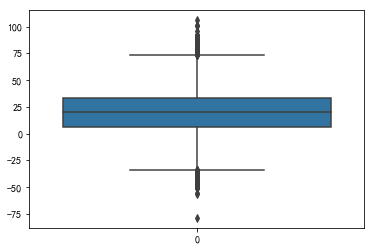

In [2]:
#用Python画一个简单的箱线图：
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.randn(50000) * 20 + 20
sns.boxplot(data=data)

**2.2 多元异常点检测**

涉及两个或多个属性或变量的数据称为多元数据。许多一元异常点检测方法都可以扩充，用来处理多元数据。其核心思想是把多元异常点检测任务转换成一元异常点检测问题。例如基于正态分布的一元异常点检测扩充到多元情形时，可以求出每一维度的均值和标准差。对于第$j$维：

$\mu_j=\frac 1m\sum_{i=1}^m x_j^{(i)}$

$\sigma_j^2=\frac 1m\sum_{i=1}^m (x_j^{(i)}-\mu_j)^2$

计算概率时的概率密度函数为

$p(x)=\prod_{j=1}^n p(x_j;\mu_j,\sigma_j^2)=\prod_{j=1}^n\frac 1{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$

这是在各个维度的特征之间相互独立的情况下。如果特征之间有相关性，就要用到多元高斯分布了。



**1.3 多个特征相关，且符合多元高斯分布**

$\mu=\frac{1}{m}\sum^m_{i=1}x^{(i)}$

$\sum=\frac{1}{m}\sum^m_{i=1}(x^{(i)}-\mu)(x^{(i)}-\mu)^T$

$p(x)=\frac{1}{(2 \pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right)$


**3.使用混合参数分布**

在许多情况下假定数据是由正态分布产生的。当实际数据很复杂时，这种假定过于简单，可以假定数据是被混合参数分布产生的。

## 3、非参数方法

在异常检测的非参数方法中，“正常数据”的模型从输入数据学习，而不是假定一个先验。通常，非参数方法对数据做较少假定，因而在更多情况下都可以使用。

**例子：使用直方图检测异常点。**

直方图是一种频繁使用的非参数统计模型，可以用来检测异常点。该过程包括如下两步：

步骤1：构造直方图。使用输入数据（训练数据）构造一个直方图。该直方图可以是一元的，或者多元的（如果输入数据是多维的）。

尽管非参数方法并不假定任何先验统计模型，但是通常确实要求用户提供参数，以便由数据学习。例如，用户必须指定直方图的类型（等宽的或等深的）和其他参数（直方图中的箱数或每个箱的大小等）。与参数方法不同，这些参数并不指定数据分布的类型。

步骤2：检测异常点。为了确定一个对象是否是异常点，可以对照直方图检查它。在最简单的方法中，如果该对象落入直方图的一个箱中，则该对象被看作正常的，否则被认为是异常点。

对于更复杂的方法，可以使用直方图赋予每个对象一个异常点得分。例如令对象的异常点得分为该对象落入的箱的容积的倒数。

使用直方图作为异常点检测的非参数模型的一个缺点是，很难选择一个合适的箱尺寸。一方面，如果箱尺寸太小，则许多正常对象都会落入空的或稀疏的箱中，因而被误识别为异常点。另一方面，如果箱尺寸太大，则异常点对象可能渗入某些频繁的箱中，因而“假扮”成正常的。

## 4、HBOS

HBOS全名为：Histogram-based Outlier Score。它是一种单变量方法的组合，不能对特征之间的依赖关系进行建模，但是计算速度较快，对大数据集友好。其基本假设是数据集的每个维度相互独立。然后对每个维度进行区间(bin)划分，区间的密度越高，异常评分越低。

HBOS算法流程：

1.为每个数据维度做出数据直方图。对分类数据统计每个值的频数并计算相对频率。对数值数据根据分布的不同采用以下两种方法：

> 1.静态宽度直方图：标准的直方图构建方法，在值范围内使用k个等宽箱。样本落入每个桶的频率（相对数量）作为密度（箱子高度）的估计。
>
> 时间复杂度：$O(n)$
>
> 

> 2.动态宽度直方图：首先对所有值进行排序，然后固定数量的$\frac{N}{k}$个连续值装进一个箱里，其	中N是总实例数，k是箱个数；直方图中的箱面积表示实例数。因为箱的宽度是由箱中第一个值和最后一个值决定的，所有箱的面积都一样，因此每一个箱的高度都是可计算的。这意味着跨度大的箱的高度低，即密度小，只有一种情况例外，超过k个数相等，此时允许在同一个箱里超过$\frac{N}{k}$值。
>
> 时间复杂度：$O(n\times log(n))$

2.对每个维度都计算了一个独立的直方图，其中每个箱子的高度表示密度的估计。然后为了使得最大高度为1（确保了每个特征与异常值得分的权重相等），对直方图进行归一化处理。最后，每一个实例的HBOS值由以下公式计算：

$$
H B O S(p)=\sum_{i=0}^{d} \log \left(\frac{1}{\text {hist}_{i}(p)}\right)
$$

**推导过程**：

假设样本*p*第 *i* 个特征的概率密度为$p_i(p)$ ，则*p*的概率密度可以计算为：
$$
P(p)=P_{1}(p) P_{2}(p) \cdots P_{d}(p)
$$
两边取对数：
$$
\begin{aligned}
\log (P(p)) &=\log \left(P_{1}(p) P_{2}(p) \cdots P_{d}(p)\right) =\sum_{i=1}^{d} \log \left(P_{i}(p)\right)
\end{aligned}
$$
概率密度越大，异常评分越小，为了方便评分，两边乘以“-1”：
$$
-\log (P(p))=-1 \sum_{i=1}^{d} \log \left(P_{t}(p)\right)=\sum_{i=1}^{d} \frac{1}{\log \left(P_{i}(p)\right)}
$$
最后可得：
$$
H B O S(p)=-\log (P(p))=\sum_{i=1}^{d} \frac{1}{\log \left(P_{i}(p)\right)}
$$

## 5、总结

1.异常检测的统计学方法由数据学习模型，以区别正常的数据对象和异常点。使用统计学方法的一个优点是，异常检测可以是统计上无可非议的。当然，仅当对数据所做的统计假定满足实际约束时才为真。

2.HBOS在全局异常检测问题上表现良好，但不能检测局部异常值。但是HBOS比标准算法快得多，尤其是在大数据集上。

#### 使用PyOD库生成toy example并调用HBOS

In [8]:
import pyod as py
# 获取数据集
contamination = 0.1  # 离群点百分比
n_train = 200  # 训练集样本量
n_test = 100  # 测试集样本量

X_train, y_train, X_test, y_test=py.utils.data.generate_data(n_train=n_train,n_test=n_test,
                                                             contamination=contamination)

/home/ma-user/anaconda3/lib/python3.6/site-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [10]:
from pyod.models.hbos import HBOS   

clf_name = 'HBOS'
clf = HBOS() # 初始化检测器clf
clf.fit(X_train) # 使用X_train训练检测器clf

# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)

# 用训练好的clf来预测未知数据中的异常值
y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
y_test_scores = clf.decision_function(X_test)  #  返回未知数据上的异常值 (分值越大越异常)


On Test Data:
HBOS ROC:0.9667, precision @ rank n:0.7


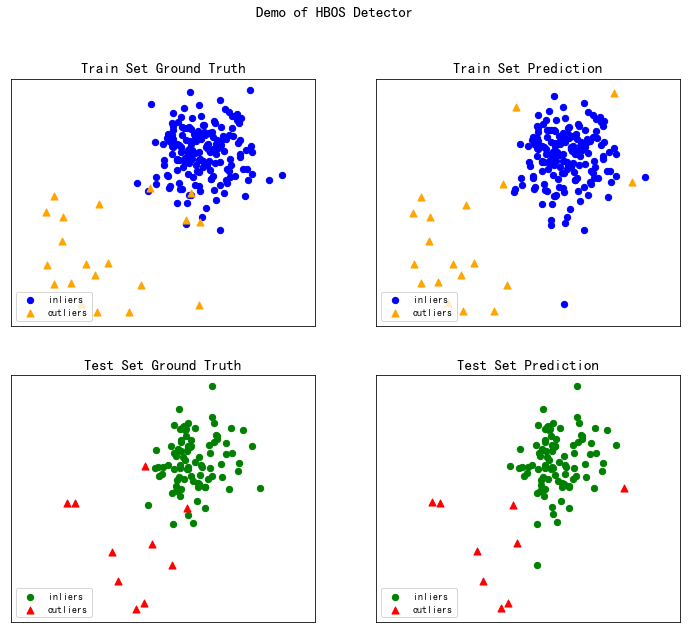

In [12]:
from pyod.utils.example import visualize
from pyod.utils.data import evaluate_print

# 评估预测结果
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# 可视化
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
    y_test_pred, show_figure=True, save_figure=False)

#### 用Pyod工具检测人工数据生成数据（使用KNN和HBOS）

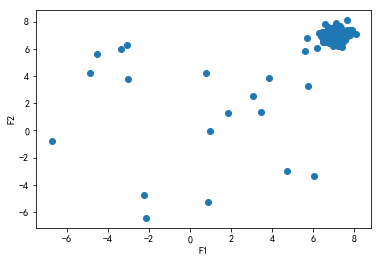

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
# 导入想要用来检测数据集中异常值的模型。使用KNN和HBOS：
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
# 创建一个带有异常值的随机数据集并绘制它
from pyod.utils.data import generate_data, get_outliers_inliers
# 生成数据
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)
# 在默认情况下，离群值在生成数据函数中是0.1
outlier_fraction = 0.1
# 将异常值和异常值存储在不同的numpy数组中
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)
n_inliers = len(x_inliers)
n_outliers = len(x_outliers)
#分离这两个特性并使用它来绘制数据
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)
# create a meshgrid
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
# scatter plot
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

No of Errors :  K Nearest Neighbors (KNN) 1
No of Errors :  HBOS 2


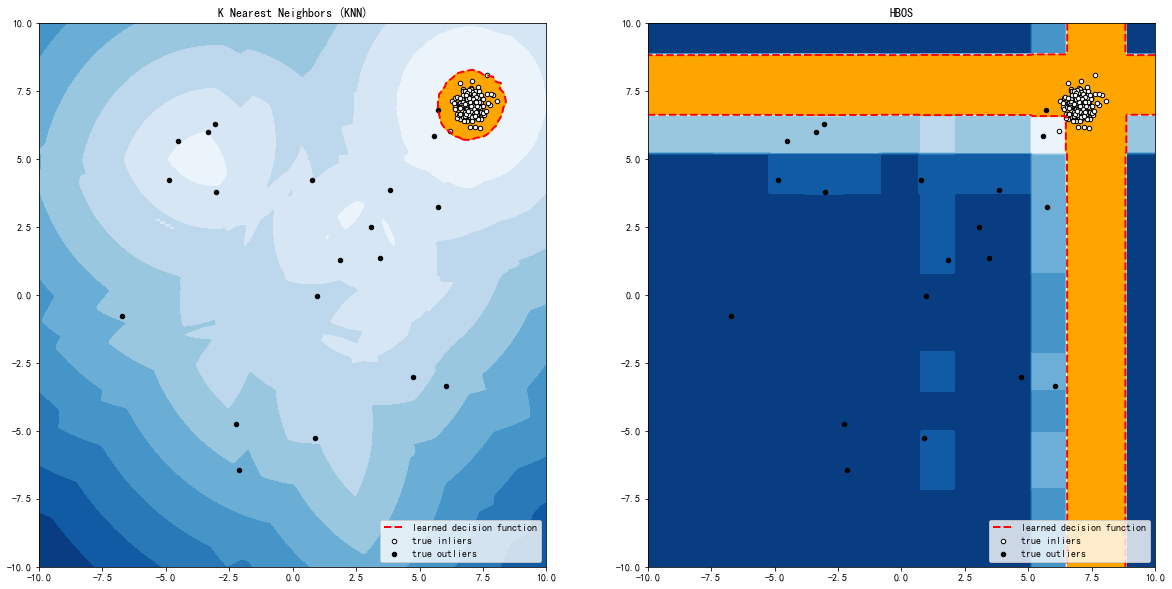

In [22]:
#创建一个dictionary并添加要用于检测异常值的所有模型：
classifiers = {
'K Nearest Neighbors (KNN)' : KNN(contamination=outlier_fraction),
'HBOS':HBOS(contamination=outlier_fraction)
}
#将数据拟合到我们在dictionary中添加的每个模型，然后，查看每个模型如何检测异常值：
#set the figure size
plt.figure(figsize=(20, 10))
for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)
    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)
    # rest of the code is to create the visualization
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    subplot = plt.subplot(1, 2, i + 1)
    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k')
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')
    subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true inliers', 'true outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='lower right')
    subplot.set_title(clf_name)
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))

plt.show()